[View in Colaboratory](https://colab.research.google.com/github/jaimevalero/python-machine-learning-book-2nd-edition/blob/checkpy/ejercicios/Keras_iris.ipynb)

# En este ejercicio vamos a hacer un modelo de deep learning con keras #

Créditos a https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/


In [0]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [0]:
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

Y = df["target"]
X = df [["sepal length (cm)",	"sepal width (cm)",	"petal length (cm)",	"petal width (cm)"]]


In [57]:

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

print(dummy_y[0:5],dummy_y[100:105])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [0]:

from keras.utils import plot_model

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	print(model.summary())
	return model

In [0]:



estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
  

In [60]:
# Solo para visualizar
!pip install graphviz 
!apt-get install graphviz 


You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [61]:
# just for visualization purposes
import pydot

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
  
from keras.utils import plot_model
plot_model(model, to_file='model.png')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_102 (Dense)            (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


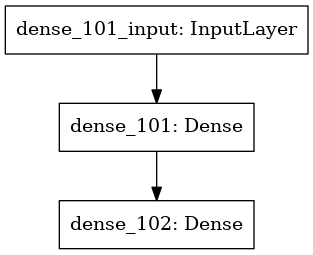

In [62]:
from IPython.display import Image
Image(filename='model.png', width=500) 

In [0]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)


In [0]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_104 (Dense)            (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_106 (Dense)            (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (t